# Разработка системы распознавания предметов интерьера в потоковом видео

## Часть 2: Выявление целевых классов

### Воропаев Роберт, 2020

В данной части происходит формирование списка целевых классов датасета. Целевые классы отбираются по порогу вхождения, а далее происходит их фильтрация и объединение на основе визуализации.

In [1]:
%matplotlib inline

#System
import os
import shutil
import random

#Base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from skimage.io import imread, imshow

#Seed
seed = 99
np.random.seed(seed)
random.seed(seed)

Для повторного использования и увеличения читаемости большинство кода было венесено в отдельные файлы `ipynb_scripts\PathFinder.py`, `ipynb_scripts\SegEncoder.py` и `ipynb_scripts\ClassList.py`. Исходный код и документацию по использованию данных функций можно найти в указанных файлах.

In [2]:
from ipynb_scripts.PathFinder import PathFinder
from ipynb_scripts.SegEncoder import SegEncoder
from ipynb_scripts.ClassList import ClassList

pf = PathFinder()
se = SegEncoder()

img_dir = 'data/ADE20K_filtred/images/'

### 1. Частотная выборка классов

Выделим все объекты из папки, сортируем их по количествую вхождений, установив порог для минимального числа вхождений.

Класс для работы со списком классов, рекурсивного обхода и сбора статистической информации по частотному нахождению объектов:

`ipynb_scripts/ClassList`

In [3]:
%%time
cl = ClassList(img_dir, min_obj=50, progress_step=500)

Size: 7166
Done: 500
Done: 1000
Done: 1500
Done: 2000
Done: 2500
Done: 3000
Done: 3500
Done: 4000
Done: 4500
Done: 5000
Done: 5500
Done: 6000
Done: 6500
Done: 7000
CPU times: user 2min 56s, sys: 27.2 s, total: 3min 24s
Wall time: 4min 24s


Список полученных частых классов:

In [4]:
cl.class_list

[['-'],
 ['wall'],
 ['chair'],
 ['floor, flooring'],
 ['painting, picture'],
 ['cabinet'],
 ['windowpane, window'],
 ['table'],
 ['light, light source'],
 ['ceiling'],
 ['lamp'],
 ['cushion'],
 ['curtain, drape, drapery, mantle, pall'],
 ['book'],
 ['door'],
 ['plant, flora, plant life'],
 ['bed'],
 ['pillow'],
 ['armchair'],
 ['bottle'],
 ['person, individual, someone, somebody, mortal, soul'],
 ['vase'],
 ['box'],
 ['sofa, couch, lounge'],
 ['wall socket, wall plug, electric outlet, electrical outlet, outlet, electric receptacle'],
 ['shelf'],
 ['flower'],
 ['plate'],
 ['glass, drinking glass'],
 ['rug, carpet, carpeting'],
 ['sink'],
 ['sconce'],
 ['mirror'],
 ['pot, flowerpot'],
 ['work surface'],
 ['towel'],
 ['desk'],
 ['swivel chair'],
 ['coffee table, cocktail table'],
 ['bowl'],
 ['plaything, toy'],
 ['basket, handbasket'],
 ['pot'],
 ['candlestick, candle holder'],
 ['stool'],
 ['switch, electric switch, electrical switch'],
 ['chest of drawers, chest, bureau, dresser'],
 ['t

In [5]:
cl.size()

193

### 2. Удаление лишних классов

Произведём ручное удаление неподходящих классов, используя данные из части с визуализацией объектов.

Функция удаления классов из найденного списка:

`ipynb_scripts/ClassList.remove_classes`

In [6]:
rm_class_list = []


#слишком частые классы
rm_class_list.append("wall")
rm_class_list.append("floor, flooring")
rm_class_list.append("ceiling")


#слишком сложные классы
rm_class_list.append("windowpane, window")
rm_class_list.append("box")
rm_class_list.append("mirror")
rm_class_list.append("basket, handbasket")
rm_class_list.append("blind, screen")
rm_class_list.append("spotlight, spot")
rm_class_list.append("railing, rail")
rm_class_list.append("seat")
rm_class_list.append("doorframe, doorcase")
rm_class_list.append("screen door, screen")
rm_class_list.append("beam")
rm_class_list.append("grill, grille, grillwork")
rm_class_list.append("rod")
rm_class_list.append("sky")
rm_class_list.append("rack")
rm_class_list.append("pane, pane of glass, window glass")
rm_class_list.append("shutter")
rm_class_list.append("machine")
rm_class_list.append("skylight, fanlight")
rm_class_list.append("piano, pianoforte, forte-piano")                    
rm_class_list.append("fireplace, hearth, open fireplace")
rm_class_list.append("double door")
rm_class_list.append("heater, warmer")
rm_class_list.append("chest")
rm_class_list.append("paper")
rm_class_list.append("document, written document, papers")
rm_class_list.append("notebook")
rm_class_list.append("booklet, brochure, folder, leaflet, pamphlet")
rm_class_list.append("board, plank")
rm_class_list.append("teapot")
rm_class_list.append("bannister, banister, balustrade, balusters, handrail")
rm_class_list.append("vent, venthole, vent-hole, blowhole")
rm_class_list.append("toaster")
rm_class_list.append("bulletin board, notice board")
rm_class_list.append("microphone, mike")
rm_class_list.append("partition, divider")
rm_class_list.append('ottoman, pouf, pouffe, puff, hassock')
rm_class_list.append('blanket, cover')
rm_class_list.append('shower')
rm_class_list.append('step, stair')
rm_class_list.append("bar")
rm_class_list.append('booth, cubicle, stall, kiosk')
rm_class_list.append('screen, silver screen, projection screen')
rm_class_list.append('shower stall, shower bath')
rm_class_list.append('eiderdown, duvet, continental quilt')
rm_class_list.append('poster, posting, placard, notice, bill, card')
rm_class_list.append("buffet, counter, sideboard")
rm_class_list.append('drawer')
rm_class_list.append('fluorescent, fluorescent fixture')
rm_class_list.append('faucet, spigot')


#бесполезные
rm_class_list.append('curtain, drape, drapery, mantle, pall')
rm_class_list.append("bottle")
rm_class_list.append("plate")
rm_class_list.append("glass, drinking glass")
rm_class_list.append("towel")
rm_class_list.append("bowl")
rm_class_list.append("plaything, toy")
rm_class_list.append("column, pillar")
rm_class_list.append("figurine, statuette")
rm_class_list.append("tray")
rm_class_list.append("jar")
rm_class_list.append("fruit")
rm_class_list.append("mug")
rm_class_list.append("pool ball")
rm_class_list.append("pool table, billiard table, snooker table")
rm_class_list.append("bag")
rm_class_list.append("pitcher, ewer")
rm_class_list.append("cup")
rm_class_list.append("bucket, pail")
rm_class_list.append("knife")
rm_class_list.append("ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin")
rm_class_list.append("tree")
rm_class_list.append("can, tin, tin can")
rm_class_list.append("sculpture")
rm_class_list.append("cue, cue stick, pool cue, pool stick")
rm_class_list.append("soap dispenser")
rm_class_list.append("teacup")
rm_class_list.append("food, solid food")
rm_class_list.append("pottery, clayware")
rm_class_list.append("arcade machine")
rm_class_list.append("ball")
rm_class_list.append("hanger")
rm_class_list.append("towel rack, towel horse")
rm_class_list.append("soap")
rm_class_list.append("bouquet, corsage, posy, nosegay")
rm_class_list.append("canister, cannister, tin")
rm_class_list.append("bag, handbag, pocketbook, purse")
rm_class_list.append("fork")
rm_class_list.append("pipe, pipage, piping")
rm_class_list.append("saucepan")
rm_class_list.append("soap dish")
rm_class_list.append("ashtray")
rm_class_list.append("bag, traveling bag, travelling bag, grip, suitcase")
rm_class_list.append("building, edifice")
rm_class_list.append("spoon")
rm_class_list.append("coffee cup")
rm_class_list.append("backpack, back pack, knapsack, packsack, rucksack, haversack")
rm_class_list.append("vase")
rm_class_list.append("pot, flowerpot")
rm_class_list.append("pot")
rm_class_list.append("chandelier, pendant, pendent")
rm_class_list.append("shoe")
rm_class_list.append("toilet tissue, toilet paper, bathroom tissue")
rm_class_list.append("signboard, sign")
rm_class_list.append("dishrag, dishcloth")
rm_class_list.append("paper towel")
rm_class_list.append("hat, chapeau, lid")
rm_class_list.append('napkin, table napkin, serviette')
rm_class_list.append('place mat')


#малый размер
rm_class_list.append("wall socket, wall plug, electric outlet, electrical outlet, outlet, electric receptacle")
rm_class_list.append("sconce")
rm_class_list.append("candlestick, candle holder")
rm_class_list.append("switch, electric switch, electrical switch")
rm_class_list.append("telephone, phone, telephone set")
rm_class_list.append("candle, taper, wax light")
rm_class_list.append("pen")
rm_class_list.append("remote control, remote")
rm_class_list.append("candelabrum, candelabra")
rm_class_list.append("spectacles, specs, eyeglasses, glasses")
rm_class_list.append("light bulb, lightbulb, bulb, incandescent lamp, electric light, electric-light bulb")
rm_class_list.append('light, light source')


#уменьшение датасета
rm_class_list.append('clock')
rm_class_list.append('mousepad, mouse mat')
rm_class_list.append('keyboard')
rm_class_list.append('lamp')
rm_class_list.append('book')
rm_class_list.append("magazine")
rm_class_list.append('shelf')
rm_class_list.append('bookcase')
rm_class_list.append('flower')
rm_class_list.append('coffee maker')
rm_class_list.append("kettle, boiler")
rm_class_list.append('system')
rm_class_list.append('stairs, steps')
rm_class_list.append('air conditioner, air conditioning')
rm_class_list.append('radiator')
rm_class_list.append('fan')
rm_class_list.append('dishwasher, dish washer, dishwashing machine')
rm_class_list.append('loudspeaker, speaker, speaker unit, loudspeaker system, speaker system')
rm_class_list.append('coffee table, cocktail table')
rm_class_list.append('cradle')
rm_class_list.append('toilet, can, commode, crapper, pot, potty, stool, throne')
rm_class_list.append('bench')
rm_class_list.append('blackboard, chalkboard')


#одежда
rm_class_list.append('apparel, wearing apparel, dress, clothes')
rm_class_list.append('shirt')
rm_class_list.append('trouser, pant')
rm_class_list.append('jacket')
rm_class_list.append('sweater, jumper')
rm_class_list.append('stairway, staircase')


#сокращение выборки
rm_class_list.append("stool")
rm_class_list.append('console table, console')
rm_class_list.append('laptop, laptop computer')
rm_class_list.append('refrigerator, icebox')
rm_class_list.append('microwave, microwave oven')
rm_class_list.append('oven')
rm_class_list.append('hood, exhaust hood')
rm_class_list.append('printer')
rm_class_list.append('person, individual, someone, somebody, mortal, soul')

In [7]:
cl.remove_classes(rm_class_list)
cl.size()

31

### 3. Объединение классов

Так как в датасете есть визуально похожие объекты, то объединим их в один класс:

Функция объединения классов из найденного списка:

`ipynb_scripts/ClassList.join_list`

In [8]:
jo_class_list = []

jo_class_list.append(['drawing', 'painting, picture'])
jo_class_list.append(['tapestry, tapis', 'painting, picture'])

jo_class_list.append(['desk', 'table'])

jo_class_list.append(['work surface', 'counter'])
jo_class_list.append(['kitchen island', 'counter'])
jo_class_list.append(['countertop', 'counter'])

jo_class_list.append(['television receiver, television, television set, tv, tv set, idiot box, boob tube, telly, goggle box' , 'monitor, monitoring device'])
jo_class_list.append(['screen, crt screen' , 'monitor, monitoring device'])
jo_class_list.append(['computer, computing machine, computing device, data processor, electronic computer, information processing system' , 'monitor, monitoring device'])

jo_class_list.append(['swivel chair', 'chair'])

jo_class_list.append(['wardrobe, closet, press', "cabinet"])

jo_class_list.append(['sofa, couch, lounge', "bed"])
jo_class_list.append(['cushion', "bed"])
jo_class_list.append(['pillow', "bed"])

In [9]:
cl.join_list(jo_class_list)
cl.size()

17

#### Финальный список классов

In [10]:
cl.class_list

[['-'],
 ['chair', 'swivel chair'],
 ['painting, picture', 'drawing', 'tapestry, tapis'],
 ['cabinet', 'wardrobe, closet, press'],
 ['table', 'desk'],
 ['door'],
 ['plant, flora, plant life'],
 ['bed', 'sofa, couch, lounge', 'cushion', 'pillow'],
 ['armchair'],
 ['rug, carpet, carpeting'],
 ['sink'],
 ['chest of drawers, chest, bureau, dresser'],
 ['stove, kitchen stove, range, kitchen range, cooking stove'],
 ['bathtub, bathing tub, bath, tub'],
 ['monitor, monitoring device',
  'television receiver, television, television set, tv, tv set, idiot box, boob tube, telly, goggle box',
  'screen, crt screen',
  'computer, computing machine, computing device, data processor, electronic computer, information processing system'],
 ['counter', 'work surface', 'kitchen island', 'countertop'],
 ['washer, automatic washer, washing machine']]

### 4. Визуализация предметов

In [16]:
def get_flatten_class_list():
    flat = []
    for megaclass in cl.class_list:
        for class_name in megaclass:
            flat.append(class_name)
            
    return flat

cl_flat = get_flatten_class_list()
cl_flat.remove('-')

Функция для рекурсивного обхода папки датасета и поиска изображений с объектами и их границ:
    
`ipynb_scripts\SegEncoder.get_hw_dict`

In [20]:
%%time
hw_all = se.get_hw_dict(dir_path=img_dir, class_list=cl_flat,
                        max_num=3, skip_probably=0.5, progress_bar=False)

CPU times: user 7min 1s, sys: 1.43 s, total: 7min 2s
Wall time: 7min 12s


Функция для отображения найденных классов в их рамках:

`ipynb_scripts\SegEncoder.show`

chair


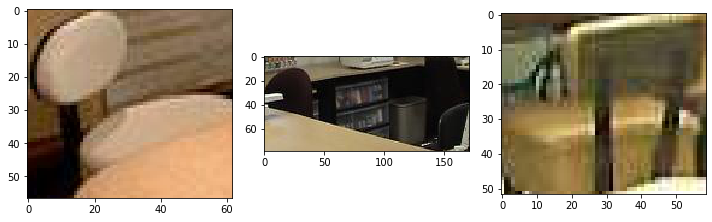

swivel chair


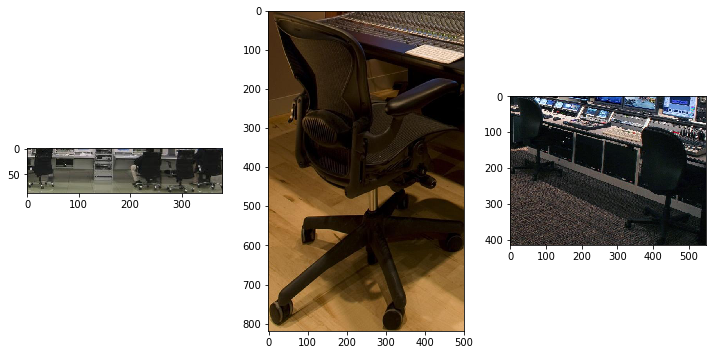

painting, picture


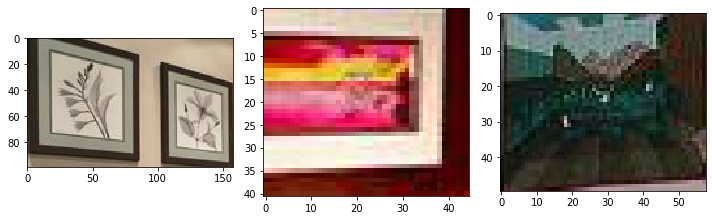

drawing


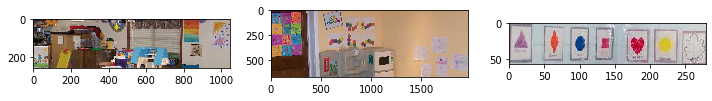

tapestry, tapis


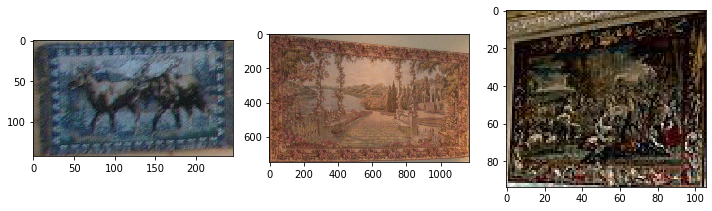

cabinet


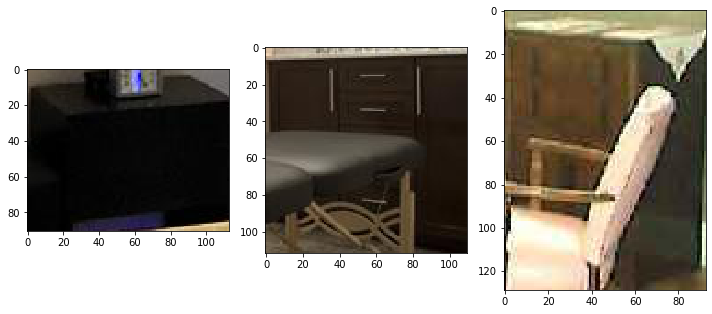

wardrobe, closet, press


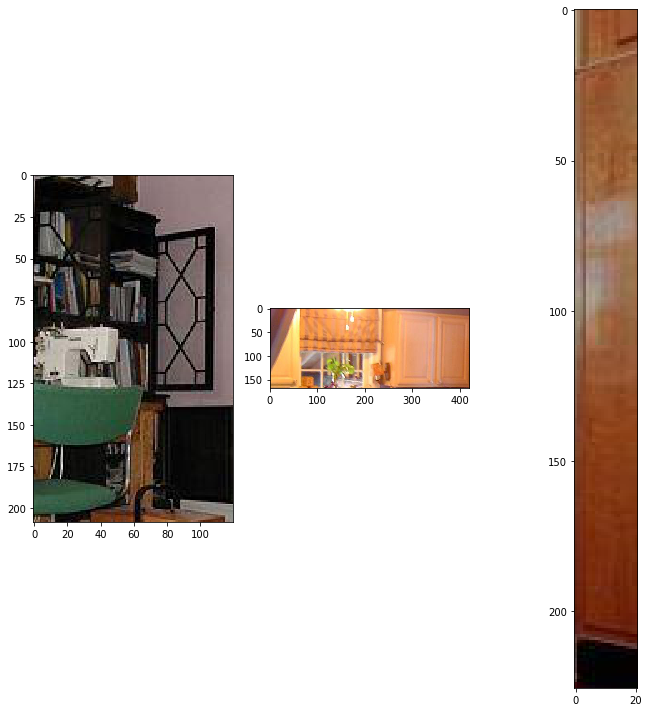

table


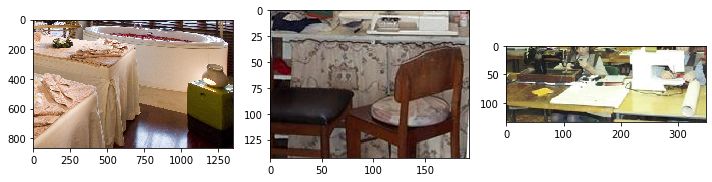

desk


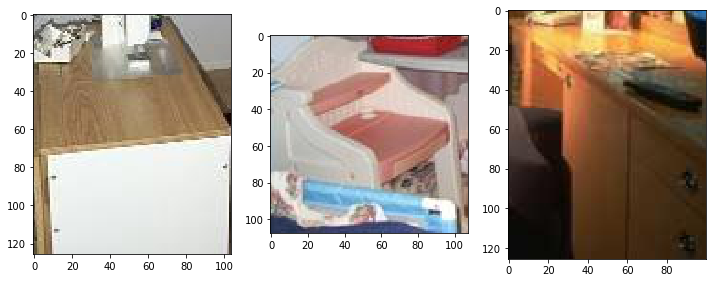

door


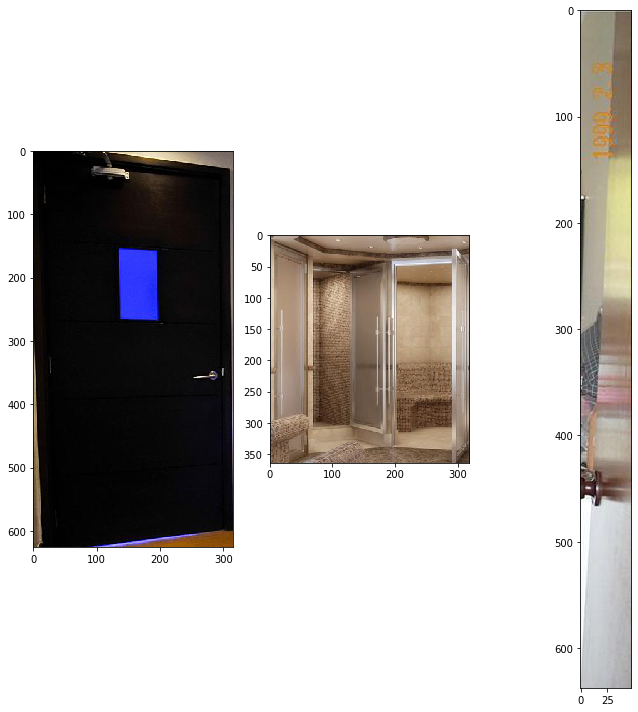

plant, flora, plant life


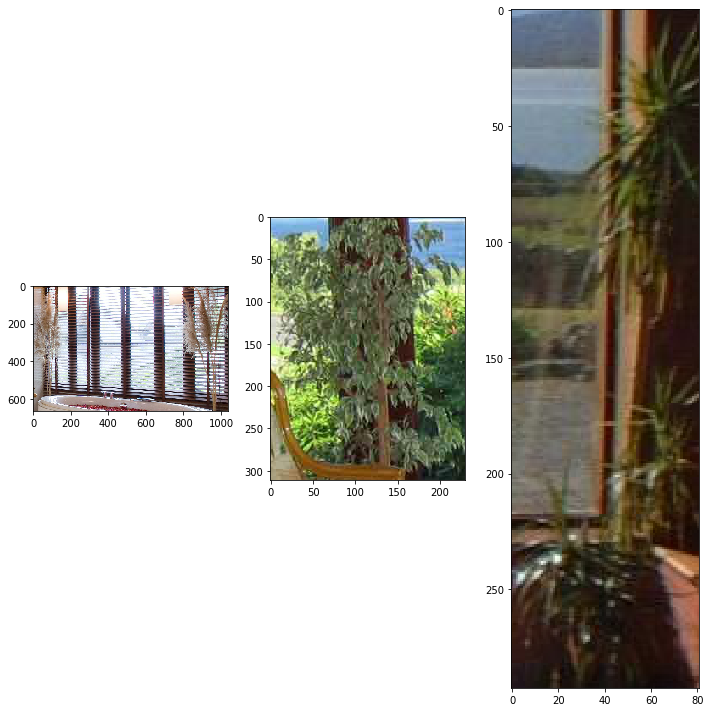

bed


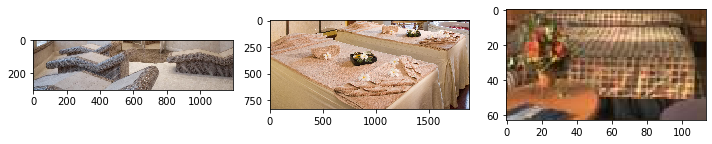

sofa, couch, lounge


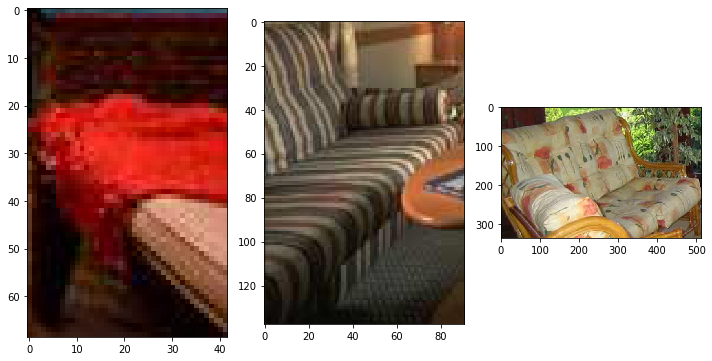

cushion


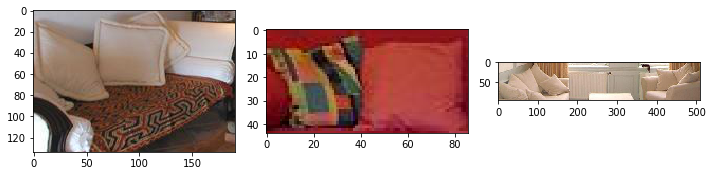

pillow


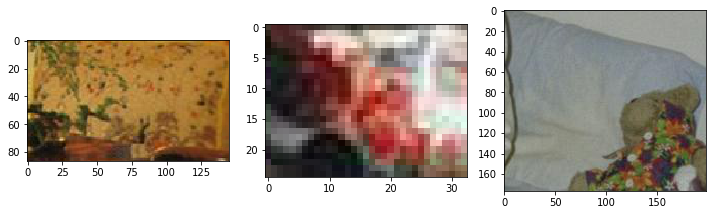

armchair


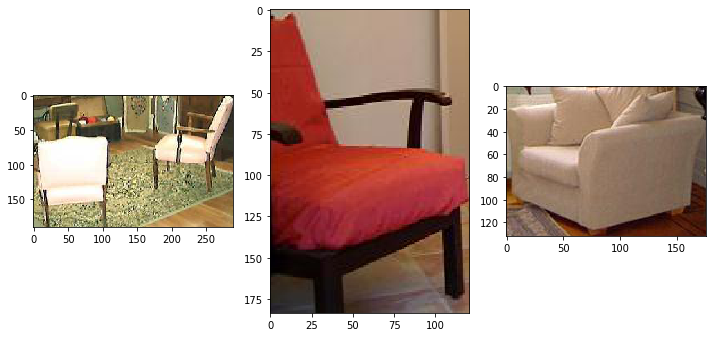

rug, carpet, carpeting


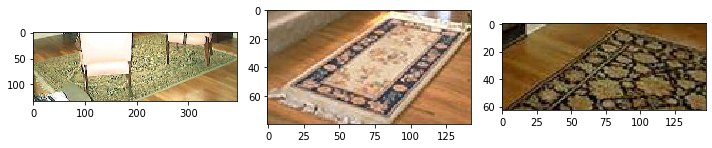

sink


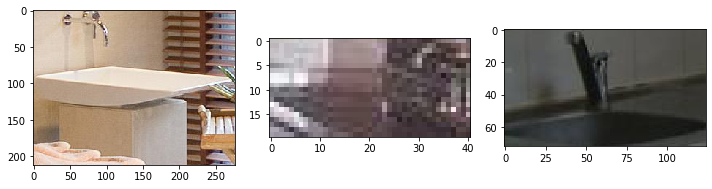

chest of drawers, chest, bureau, dresser


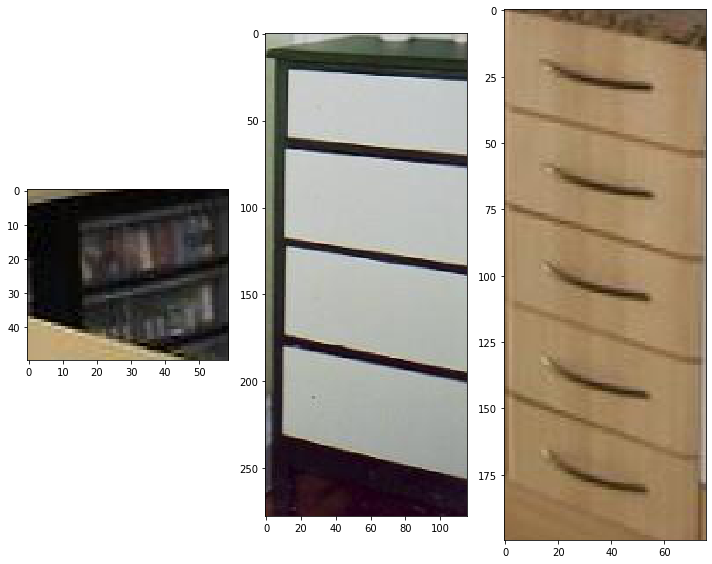

stove, kitchen stove, range, kitchen range, cooking stove


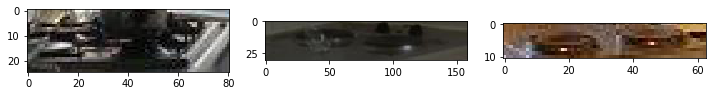

bathtub, bathing tub, bath, tub


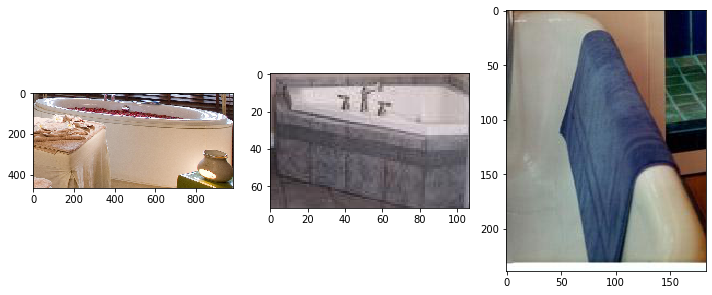

monitor, monitoring device


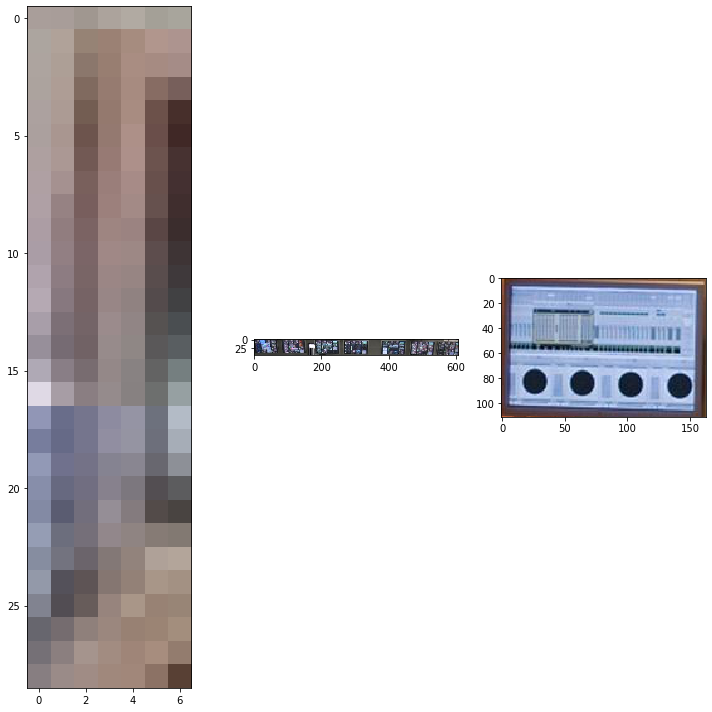

television receiver, television, television set, tv, tv set, idiot box, boob tube, telly, goggle box


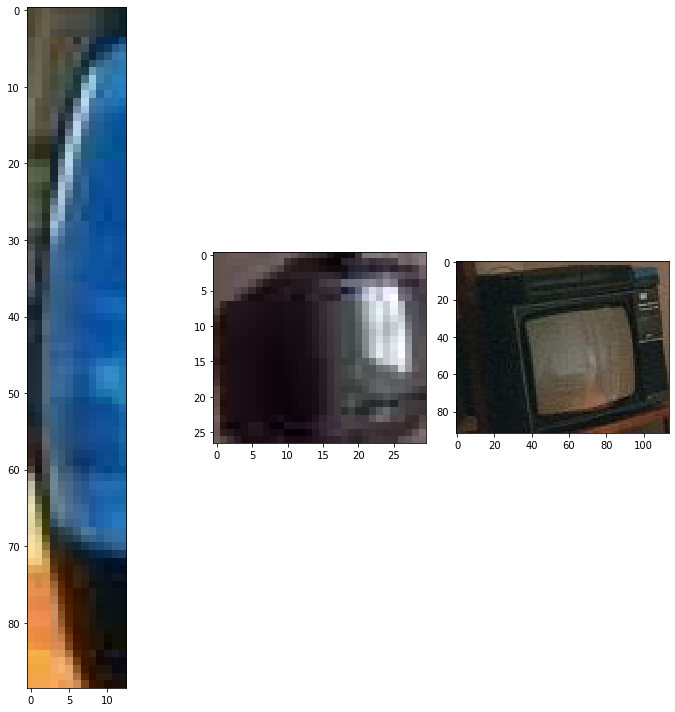

screen, crt screen


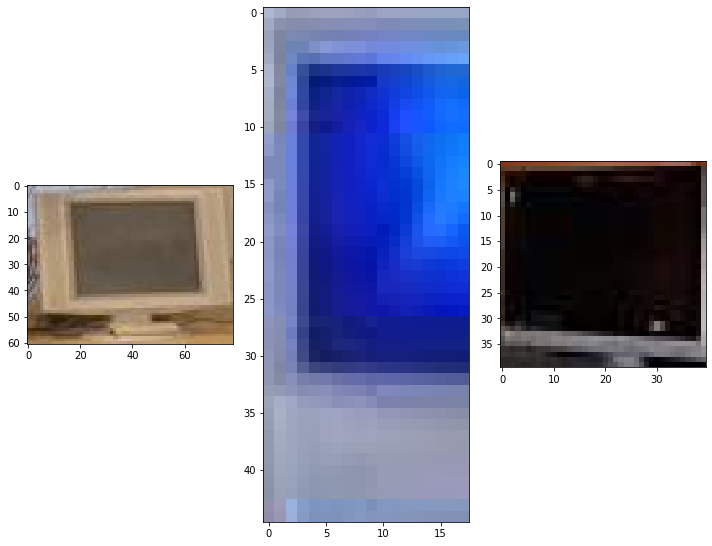

computer, computing machine, computing device, data processor, electronic computer, information processing system


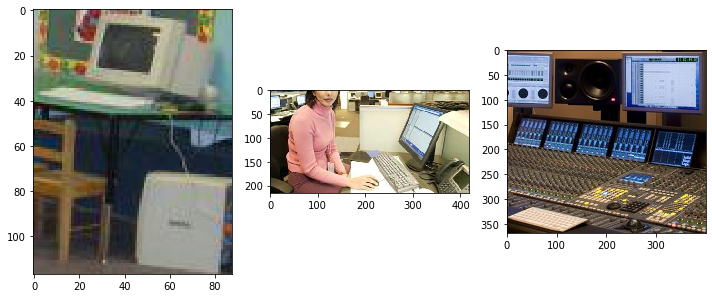

counter


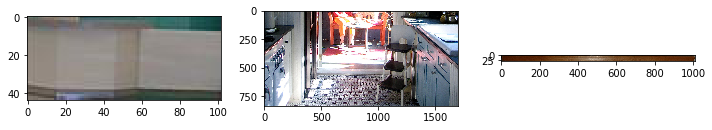

work surface


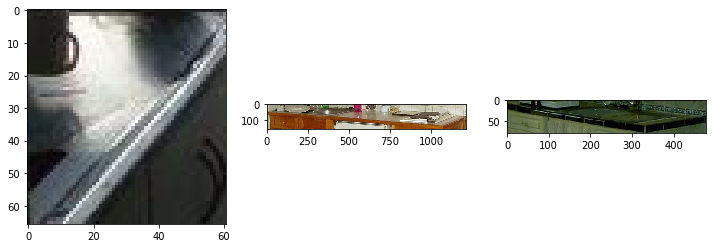

kitchen island


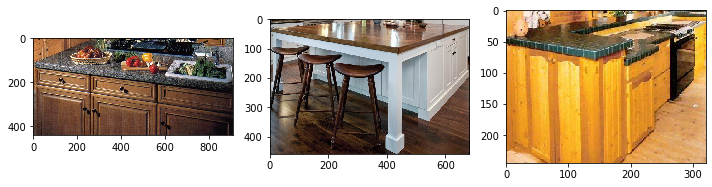

countertop


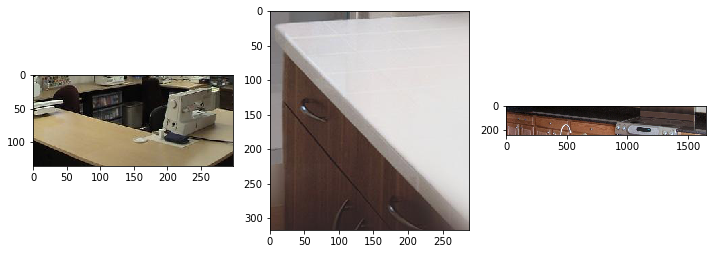

washer, automatic washer, washing machine


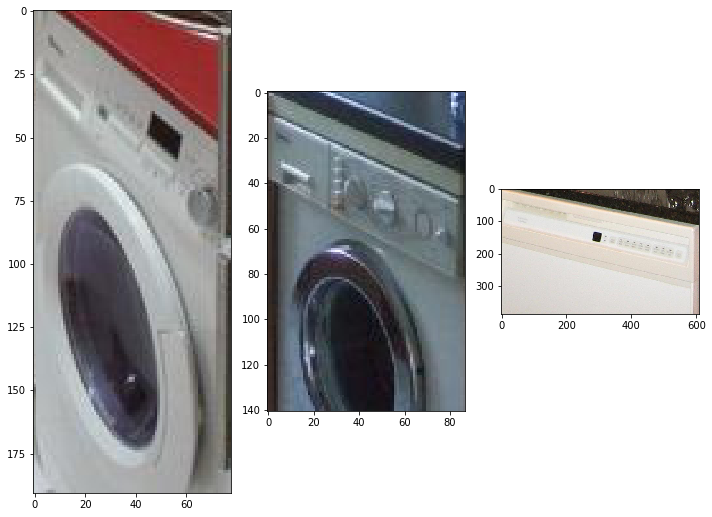

In [23]:
se.show(hw_all, cl_flat, subplot_num=3)

### 4. Сохранение результатов

#### Список классов 

Функция сохранения списка классов в файл:

`ipynb_scripts\ClassList.save_class_list`

In [14]:
cl.save_class_list('static/class_list.txt')

#### Правила перекодирования масок

Совместим список классов с их индексами на исходной и новой маски.

Функция сохранения правила перекодирования масок в файл:

`ipynb_scripts\ClassList.save_class_encode`

In [15]:
cl.save_class_encode('static/class_encode.txt')